In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [2]:
ff1.Cache.enable_cache('C:\code\python/2022_season_analysis_CODES')

In [3]:
aus_quali = ff1.get_session(2022, 'Australia', 'Q')
print(aus_quali.date)

2022-04-09 16:00:00


QUALIFYING

In [4]:
aus_quali.load();
aus_quali_laps = aus_quali.laps

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '18']


In [5]:
aus_quali.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:18.881000,0 days 00:01:18.606000,0 days 00:01:17.868000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,2.0,0.0,0 days 00:01:18.580000,0 days 00:01:18.611000,0 days 00:01:18.154000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,0.0,0 days 00:01:18.834000,0 days 00:01:18.340000,0 days 00:01:18.240000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,4.0,0.0,0 days 00:01:19.280000,0 days 00:01:19.066000,0 days 00:01:18.703000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,5.0,0.0,0 days 00:01:19.401000,0 days 00:01:19.106000,0 days 00:01:18.825000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,6.0,0.0,0 days 00:01:19.405000,0 days 00:01:19.076000,0 days 00:01:18.933000,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,7.0,0.0,0 days 00:01:19.665000,0 days 00:01:19.130000,0 days 00:01:19.032000,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,8.0,0.0,0 days 00:01:19.605000,0 days 00:01:19.136000,0 days 00:01:19.061000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,9.0,0.0,0 days 00:01:18.983000,0 days 00:01:18.469000,0 days 00:01:19.408000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,10.0,0.0,0 days 00:01:19.192000,0 days 00:01:18.815000,NaT,NaT,,0.0


Fastest Qualifying Lap:

In [6]:
fastest_quali_lap = aus_quali_laps.pick_fastest()
fastest_quali_lap

Time                      0 days 01:47:16.360000
DriverNumber                                  16
LapTime                   0 days 00:01:17.868000
LapNumber                                     20
Stint                                          5
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.740000
Sector2Time               0 days 00:00:17.786000
Sector3Time               0 days 00:00:33.342000
Sector1SessionTime        0 days 01:46:25.232000
Sector2SessionTime        0 days 01:46:43.018000
Sector3SessionTime        0 days 01:47:16.360000
SpeedI1                                    284.0
SpeedI2                                    302.0
SpeedFL                                    301.0
SpeedST                                    288.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     4.0
FreshTyre           

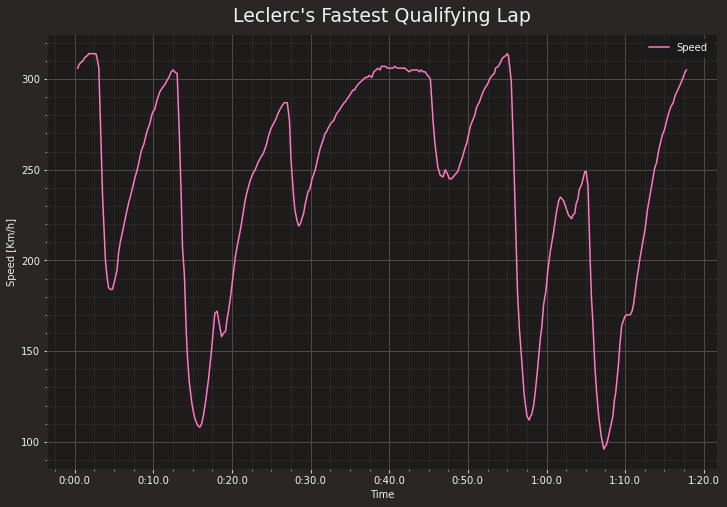

In [7]:
lec_fastest_quali_lap = aus_quali_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_quali_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Qualifying Lap")
ax.legend()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


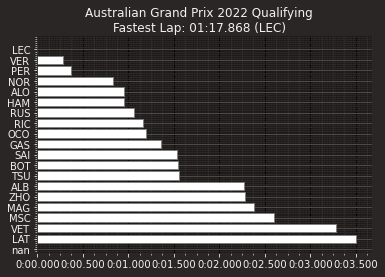

In [8]:
drivers = pd.unique(aus_quali.laps['Driver'])
#print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = aus_quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color='white', edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{aus_quali.event['EventName']} {aus_quali.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()


c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '1

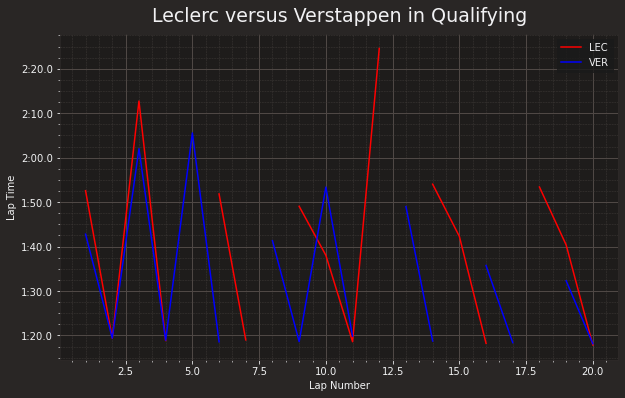

In [9]:
laps = aus_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('VER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Verstappen in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'VER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '1

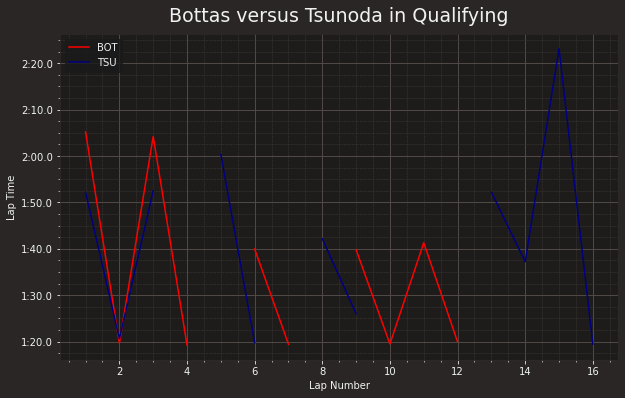

In [10]:
laps = aus_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('BOT')
drv_2 = laps.pick_driver('TSU')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='navy')
ax.set_title('Bottas versus Tsunoda in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['BOT', 'TSU'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '1

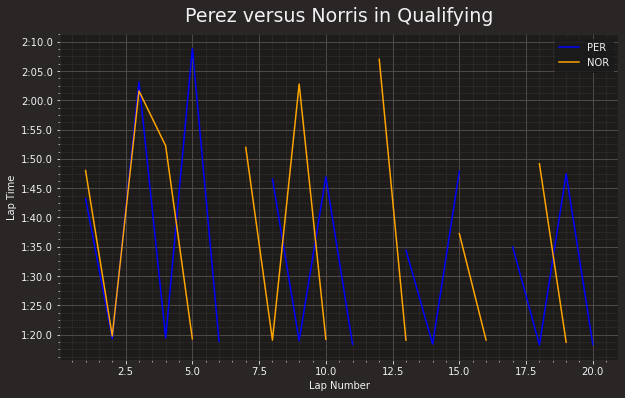

In [11]:
laps = aus_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('PER')
drv_2 = laps.pick_driver('NOR')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='blue')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='orange')
ax.set_title('Perez versus Norris in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['PER', 'NOR'])

RACE

In [12]:
aus_race = ff1.get_session(2022, 'Australia', 'R')
print(aus_race.date)

2022-04-10 15:00:00


In [13]:
aus_race.load();
aus_race_laps = aus_race.laps
aus_race_laps

core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:43.368000,16,NaT,1,1,0 days 00:24:52.909000,NaT,NaT,0 days 00:00:18.645000,0 days 00:00:36.781000,...,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Ferrari,LEC,1,False,2022-04-10 05:03:13.407
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaT,NaT,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,...,False,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,0 days 00:01:43.345000,3,1,NaT,NaT,0 days 00:00:29.279000,0 days 00:00:24.719000,0 days 00:00:49.347000,...,False,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,0 days 00:02:15.102000,4,1,NaT,NaT,0 days 00:00:42.800000,0 days 00:00:30.843000,0 days 00:01:01.459000,...,False,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,0 days 00:02:14.936000,5,1,NaT,NaT,0 days 00:00:45.666000,0 days 00:00:30.394000,0 days 00:00:58.876000,...,False,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0 days 01:32:39.084000,5,0 days 00:01:25.503000,19,1,NaT,NaT,0 days 00:00:29.519000,0 days 00:00:18.562000,0 days 00:00:37.422000,...,False,HARD,20.0,False,0 days 01:31:13.581000,Aston Martin,VET,1,True,2022-04-10 05:32:13.592
1038,0 days 01:34:04.482000,5,0 days 00:01:25.398000,20,1,NaT,NaT,0 days 00:00:29.553000,0 days 00:00:18.662000,0 days 00:00:37.183000,...,False,HARD,21.0,False,0 days 01:32:39.084000,Aston Martin,VET,1,True,2022-04-10 05:33:39.095
1039,0 days 01:35:29.987000,5,0 days 00:01:25.505000,21,1,NaT,NaT,0 days 00:00:29.668000,0 days 00:00:18.606000,0 days 00:00:37.231000,...,False,HARD,22.0,False,0 days 01:34:04.482000,Aston Martin,VET,1,True,2022-04-10 05:35:04.493
1040,0 days 01:36:56.992000,5,0 days 00:01:27.005000,22,1,NaT,NaT,0 days 00:00:30.467000,0 days 00:00:18.909000,0 days 00:00:37.629000,...,False,HARD,23.0,False,0 days 01:35:29.987000,Aston Martin,VET,1,True,2022-04-10 05:36:29.998


In [14]:
aus_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,4.0,NaT,NaT,NaT,0 days 01:28:39.851000,Finished,10.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,6.0,7.0,NaT,NaT,NaT,0 days 01:28:40.285000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,8.0,NaT,NaT,NaT,0 days 01:28:48.231000,Finished,6.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,8.0,12.0,NaT,NaT,NaT,0 days 01:28:54.987000,Finished,4.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,9.0,11.0,NaT,NaT,NaT,0 days 01:29:02.769000,Finished,2.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,10.0,20.0,NaT,NaT,NaT,0 days 01:29:05.930000,Finished,1.0


In [15]:
fastest_race_lap = aus_race_laps.pick_fastest()
fastest_race_lap

Time                      0 days 02:30:00.229000
DriverNumber                                  16
LapTime                   0 days 00:01:20.260000
LapNumber                                     58
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.044000
Sector2Time               0 days 00:00:17.878000
Sector3Time               0 days 00:00:34.338000
Sector1SessionTime        0 days 02:29:08.013000
Sector2SessionTime        0 days 02:29:25.891000
Sector3SessionTime        0 days 02:30:00.229000
SpeedI1                                    280.0
SpeedI2                                    316.0
SpeedFL                                    289.0
SpeedST                                      NaN
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    36.0
FreshTyre           

In [16]:
aus_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,4.0,NaT,NaT,NaT,0 days 01:28:39.851000,Finished,10.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,6.0,7.0,NaT,NaT,NaT,0 days 01:28:40.285000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,8.0,NaT,NaT,NaT,0 days 01:28:48.231000,Finished,6.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,8.0,12.0,NaT,NaT,NaT,0 days 01:28:54.987000,Finished,4.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,9.0,11.0,NaT,NaT,NaT,0 days 01:29:02.769000,Finished,2.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,10.0,20.0,NaT,NaT,NaT,0 days 01:29:05.930000,Finished,1.0


c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


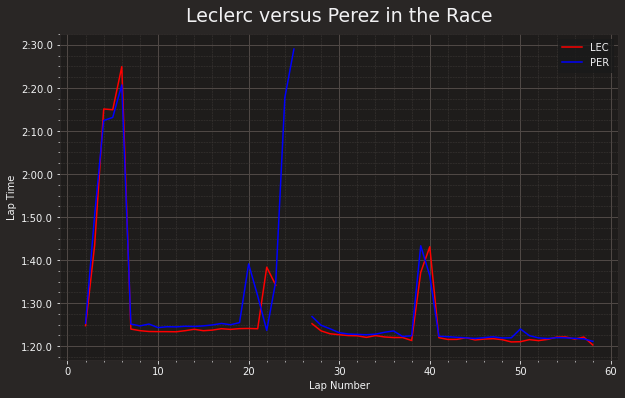

In [17]:
laps = aus_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('PER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Perez in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'PER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


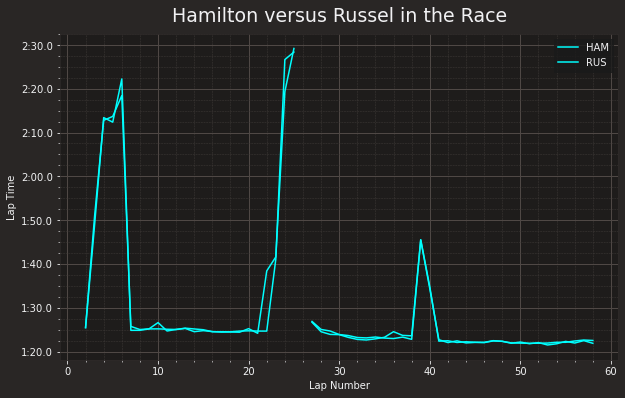

In [18]:
laps = aus_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('HAM')
drv_2 = laps.pick_driver('RUS')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='cyan')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='cyan')
ax.set_title('Hamilton versus Russel in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['HAM', 'RUS'])

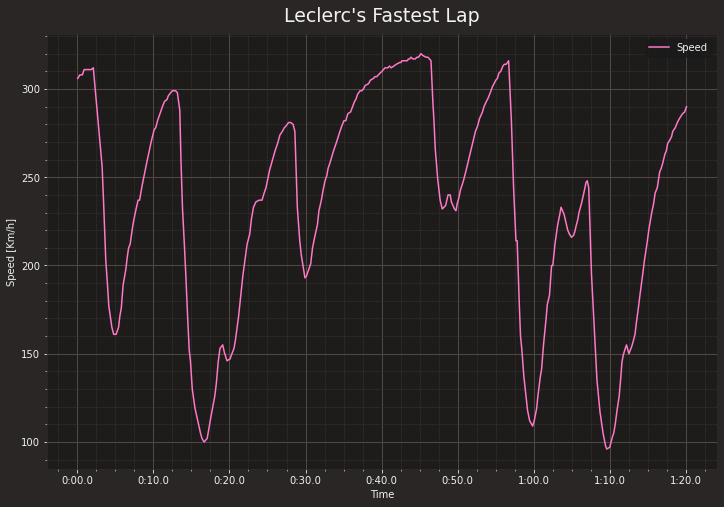

In [19]:
lec_fastest_lap = aus_race_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Lap")
ax.legend()